In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install openpyxl

In [3]:
pip install xlrd

In [2]:
#Reading the Data using the Engine xlrd - which is used to read the excel file in the format (xls, xlsx)
#openpyxl is used to read and write excel files (xlsx, xlsm, xltx and xltm)
data_1 = pd.read_excel("./L1_LinearRegression/DS3.xls", engine='xlrd')
data_1.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [3]:
#Finding if the Dataset has any na values or null values
print(data_1.isna().values.any())
print(data_1.isnull().values.any())

False
False


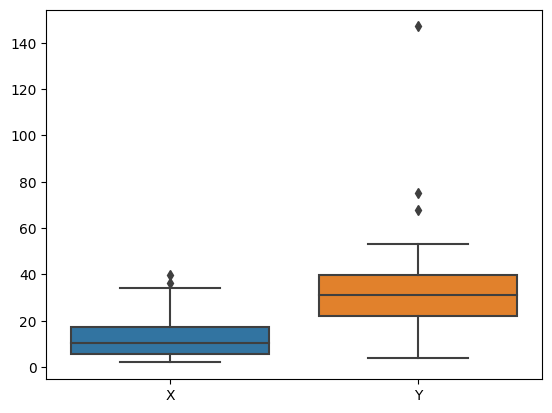

In [4]:
#Visulizing the Dataset to find whether we have any outliers
import seaborn as sns
sns.boxplot(data_1) #Box Plot
plt.show()

In [5]:
#Identifying and Removing Outliers in the Dataset using IQR (Interquartile range)

import numpy as np

#Calculating the Interquartile Range for X
x_q25, x_q75 = np.percentile(data_1['X'], 25), np.percentile(data_1['X'], 75, method='midpoint')
x_iqr = x_q75 - x_q25
print('Percentiles (X): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(x_q25, x_q75, x_iqr))

#Calculating the Interquartile Range for Y
y_q25, y_q75 = np.percentile(data_1['Y'], 25), np.percentile(data_1['Y'], 75, method='midpoint')
y_iqr = y_q75 - y_q25
print('Percentiles (Y): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(y_q25, y_q75, y_iqr))

#Calculating the Outlier cutoff (i.e. defining the Upper and lower bounds)

#Base values of X
x_cut_off = x_iqr * 1.5
x_lower, x_upper = x_q25 - x_cut_off, x_q75 + x_cut_off

#Base values of Y
y_cut_off = y_iqr * 1.5
y_lower, y_upper = y_q25 - y_cut_off, y_q75 + y_cut_off

#Identifying the Outliers
#In X
x_upper_array = np.array(data_1['X']>=x_upper)
print("Upper Bound: ", x_upper)
print("No. of Outliers of X above the upper bound: ", x_upper_array.sum())

x_lower_array = np.array(data_1['X']<= x_lower)
print("Lower Bound: ", x_lower)
print("No. of Outliers of X below the lower bound: ", x_lower_array.sum())

print("No. of Outliers of X: ", x_upper_array.sum() + x_lower_array.sum())

#In Y
y_upper_array = np.array(data_1['Y']>=y_upper)
print("Upper Bound: ", y_upper)
print("No. of Outliers of Y above the upper bound: ", y_upper_array.sum())

y_lower_array = np.array(data_1['Y']<= y_lower)
print("Lower Bound: ", y_lower)
print("No. of Outliers of Y below the lower bound: ", y_lower_array.sum())

print("No. of Outliers of Y: ", y_upper_array.sum() + y_lower_array.sum())

Percentiles (X): 25th=5.625, 75th=16.950, IQR=11.325
Percentiles (Y): 25th=22.000, 75th=39.500, IQR=17.500
Upper Bound:  33.9375
No. of Outliers of X above the upper bound:  3
Lower Bound:  -11.362499999999997
No. of Outliers of X below the lower bound:  0
No. of Outliers of X:  3
Upper Bound:  65.75
No. of Outliers of Y above the upper bound:  3
Lower Bound:  -4.25
No. of Outliers of Y below the lower bound:  0
No. of Outliers of Y:  3


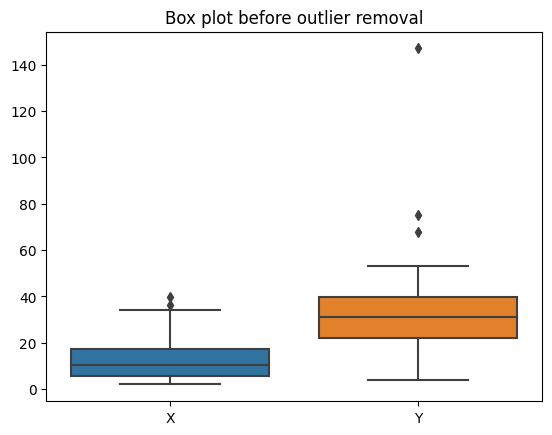

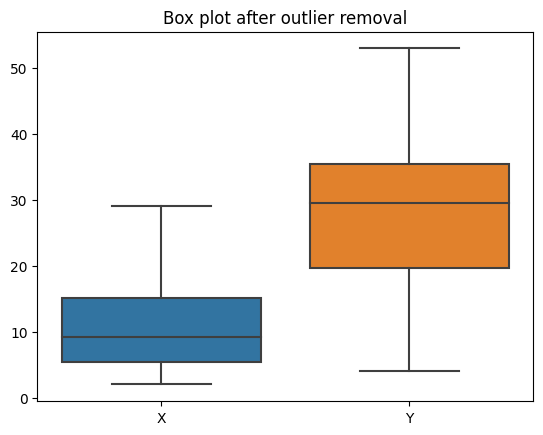

In [6]:
#Removing the Outliers using IQR Method

sns.boxplot(data_1)
plt.title('Box plot before outlier removal')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] >= (iqr + np.percentile(df[field_name], 75))].index, inplace=True) #Removing Outliers above the upper bound
    df.drop(df[df[field_name] <= (np.percentile(df[field_name], 25) - iqr)].index, inplace=True) #Removing Outliers below the lower bound

drop_outliers(data_1, 'X')
drop_outliers(data_1, 'Y')
sns.boxplot(data_1)
plt.title('Box plot after outlier removal')
plt.show()

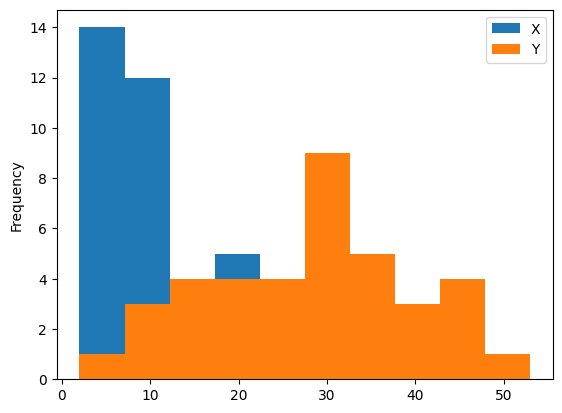

In [7]:
#Finding out which features affects the overall output
data_1.plot(kind='hist')
plt.show()

,X,Y
0,-0.638307,0.043161
1,-0.184802,1.337984
2,-0.047376,0.647412
3,-0.432168,0.733733
4,-0.308485,2.114879
7,-0.542109,-0.906377
8,-0.487139,0.215804
9,0.584784,-0.302126
10,2.508747,0.474769
11,-1.188011,-1.251663


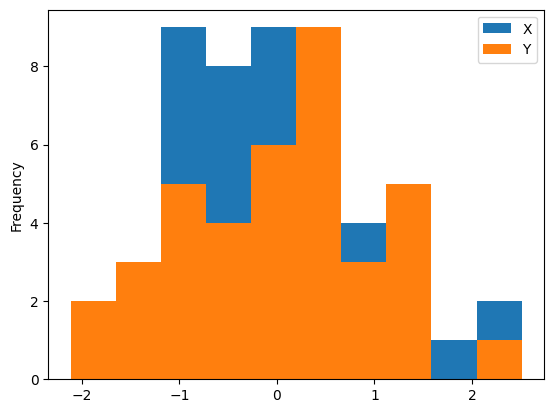

In [8]:
#Copying the Dataset
data_1_copy = data_1.copy()

#Applying the Z-score Normalization Technique
for column in data_1_copy:
    data_1_copy[column] = (data_1_copy[column] - data_1_copy[column].mean()) / data_1_copy[column].std()

#Viewing the Normalized Data
display(data_1_copy)

#Plotting
data_1_copy.plot(kind='hist')
plt.show()

In [9]:
#Splitting the Dataset into training and testing using numpy

data_split = np.random.rand(len(data_1_copy)) < 0.8 #Getting 80% of the overall dataset
train_data = data_1_copy[data_split] #80% data as train_data
test_data = data_1_copy[~data_split] #Remaining data as test_data
print(train_data)
print(test_data)

           X         Y
0  -0.638307  0.043161
1  -0.184802  1.337984
2  -0.047376  0.647412
3  -0.432168  0.733733
4  -0.308485  2.114879
7  -0.542109 -0.906377
8  -0.487139  0.215804
9   0.584784 -0.302126
10  2.508747  0.474769
11 -1.188011 -1.251663
12 -0.707020 -1.510628
13 -1.215497 -1.510628
16 -0.748248 -0.129482
18 -0.500881  0.043161
19  0.584784  0.129482
20  0.777180  0.992698
24  1.052032 -0.561090
25  1.711677  0.043161
26  0.186248  1.510628
28  1.505538 -2.114879
30 -0.253515  0.906377
31 -0.995615 -1.165341
33  2.440034 -0.129482
34  0.900863  0.302126
35  0.062565  0.474769
36 -1.023100 -0.992698
37  0.145021  1.510628
39 -0.019891  1.251663
40 -0.006148  0.474769
41 -0.830704 -0.820055
           X         Y
14 -1.146784 -0.561090
15 -0.940645 -1.079020
17 -1.188011 -1.683271
21  1.038289  0.302126
27 -0.720763 -0.474769
29  1.478052  0.215804
32 -0.803219  0.302126
38 -0.047376  1.165341


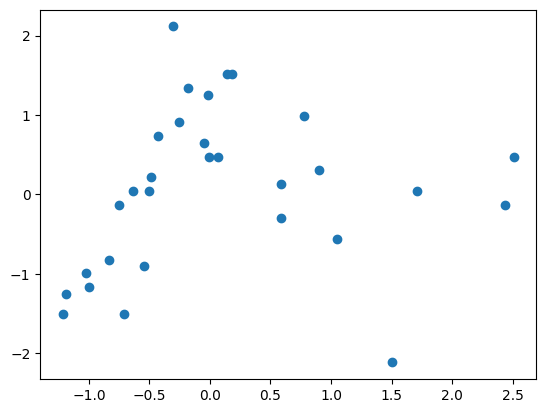

In [10]:
#Plotting the Data

plt.scatter(train_data['X'], train_data['Y'])
plt.show()

In [11]:
#Feature Selection
X = train_data['X'].values
Y = train_data['Y'].values
print("Target: %s, \nFeatures: %s" %(Y, X))

Target: [ 0.04316079  1.33798445  0.64741183  0.73373341  2.11487865 -0.90637656
  0.21580394 -0.30212552  0.47476868 -1.25166288 -1.51062761 -1.51062761
 -0.12948237  0.04316079  0.12948237  0.99269814 -0.56109025  0.04316079
  1.51062761 -2.11487865  0.90637656 -1.1653413  -0.12948237  0.30212552
  0.47476868 -0.99269814  1.51062761  1.25166288  0.47476868 -0.82005499], 
Features: [-0.63830745 -0.18480176 -0.04737579 -0.4321685  -0.30848513 -0.54210927
 -0.48713888  0.58478365  2.50874717 -1.18801131 -0.70702043 -1.2154965
 -0.74824822 -0.50088148  0.58478365  0.77718     1.05203193  1.71167657
  0.18624835  1.50553762 -0.25351474 -0.99561496  2.44003418  0.90086337
  0.06256498 -1.02310015  0.14502056 -0.0198906  -0.006148   -0.8307038 ]


In [12]:
#Determining the Mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

print(n)

30


In [13]:
#Calculating the Slope and y-intercept
num = 0
denom = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = num / denom 
c = mean_y - (m * mean_x)

#printing the Coefficients
print("m = ", m)
print("c = ", c)

m =  0.16275991374059234
c =  0.04778161552250517


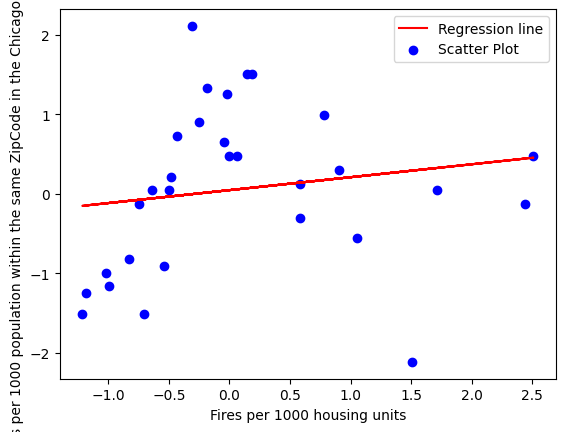

In [14]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x
y = c + m * X



#Plotting the Regression line
plt.plot(X, y, color="Red", label="Regression line")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot")
plt.xlabel("Fires per 1000 housing units")
plt.ylabel("Thefts per 1000 population within the same ZipCode in the Chicago Metro Area")
plt.legend()
plt.show()

In [15]:
#Getting the Values of Test data
X_test = test_data['X'].values
Y_test = test_data['Y'].values

mean_test_X = X_test.mean()
mean_test_Y = Y_test.mean()

In [16]:
#Calculating the Mean Squared Error (MSE)

sq_error = 0 #Squared Error

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sq_error += (Y_test[i] - y_pred)**2

MSE = sq_error / mean_test_Y
print("The Mean Squared Error is: ", MSE)

The Mean Squared Error is:  -22.428409860804102


In [17]:
#Calculating R-Squared value for measuring goodness of our model

sst = 0 #Total Sum of Squares
ssr = 0 #Total Sum of Squares of Residuals

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sst += (Y_test[i] - mean_test_Y) **2
    ssr += (Y_test[i] - y_pred) **2
r2 = 1- (ssr/sst)
print("R-Squared Test: ",r2)

R-Squared Test:  0.11062720104506463


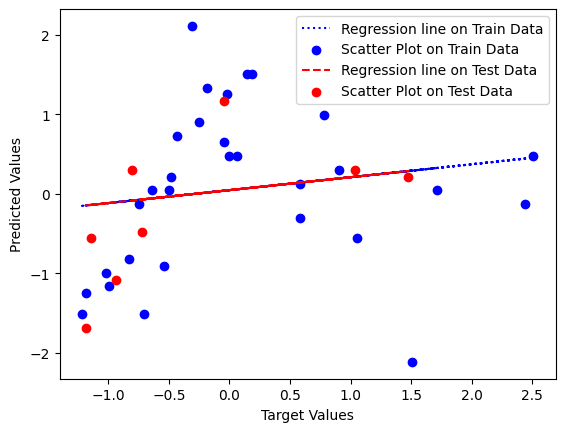

In [18]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x

#Training Dataset
y = c + m * X

#Plotting the Regression line
plt.plot(X, y, color="Blue", label="Regression line on Train Data", linestyle="dotted")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot on Train Data")


#Test Dataset
y_test = c + m * X_test

#Plotting the Regression line
plt.plot(X_test, y_test, color="Red", label="Regression line on Test Data", linestyle="dashed")

#Plotting the Scatter Points
plt.scatter(X_test, Y_test, color="Red", label="Scatter Plot on Test Data")
plt.xlabel("Target Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()